In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.multioutput import MultiOutputClassifier



In [2]:


with open("mei.csv", 'r', encoding="utf-8") as read_: #read다음에_는 의미가 없다. read랑 헷갈리지말라고 쓴 것. a 라고 해도 무방.
    text=read_.readlines()

rows=[]
for i in text[1:]:
    rows.append(list(map(int,i.split(",")[:-1]))) # 이름으로 끝나기 때문에 , 가 없다 그래서 -1로 슬라이싱 해준다.
print(i)

df=pd.DataFrame(rows)
df.columns=["sensor%d"%i for i in range(1,17)]

with open("jo.csv", 'r', encoding="utf-8") as read_:
    text2=read_.readlines()
    

rows2=[]
for i in text2[1:]:
    rows2.append(list(map(int,i.split(",")[:-1])))
print(i)

with open("joo.csv", 'r', encoding="utf-8") as read_:
    text3=read_.readlines()
    
rows9=[]
for i in text3[1:]:
    rows9.append(list(map(int,i.split(",")[:-1])))
print(i)

df2=pd.DataFrame(rows2)
df2.columns=["sensor%d"%i for i in range(1,17)]


df3=pd.DataFrame(rows9)
df3.columns=["sensor%d"%i for i in range(1,17)]



52,54,58,62,63,66,68,70,68,70,70,73,74,75,77,78,Mei
65,68,66,68,71,74,74,76,72,74,74,75,76,77,80,80,조진호
51,55,58,60,66,67,67,69,68,70,74,73,78,76,78,80,최주원


<AxesSubplot:>

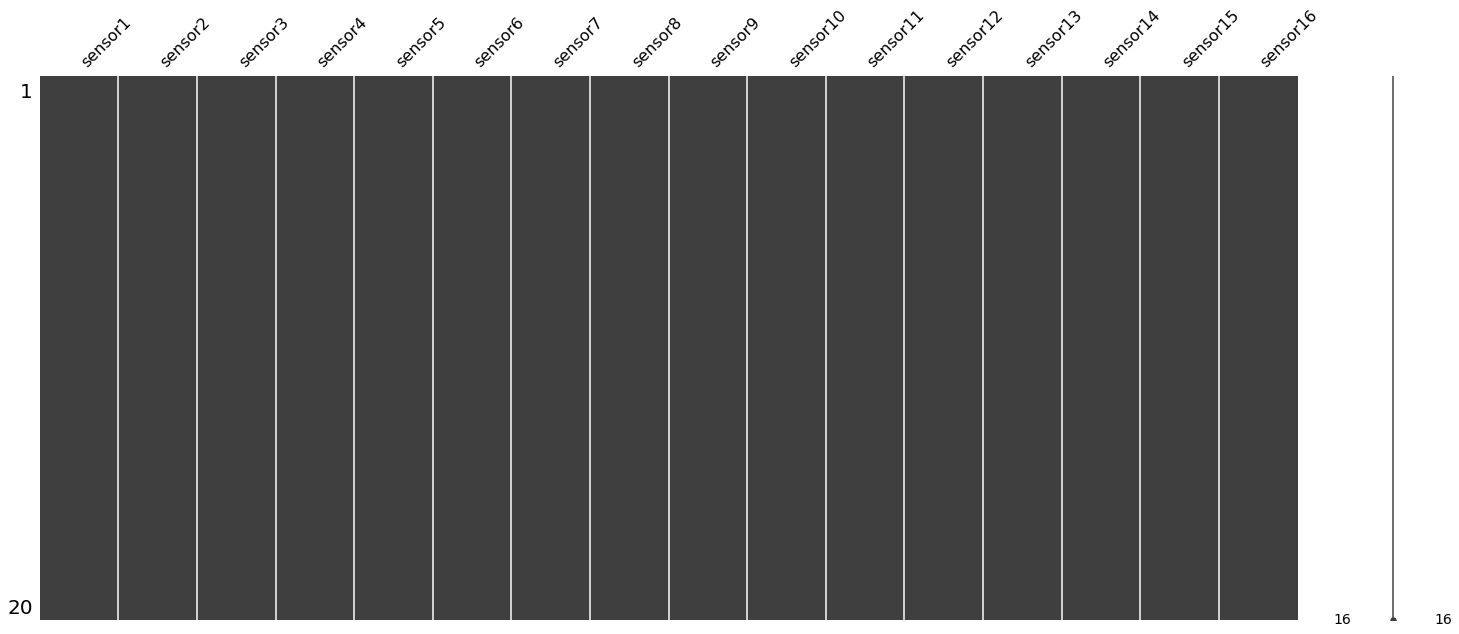

In [3]:
import missingno as msno

msno.matrix(df)

# msno.matrix(df) 을 통해 결측치가 없음을 확인하였다.



In [4]:

rows=[]

with open('jojin2.csv', 'r',encoding= 'utf-8') as read_: 
    #read다음에_는 의미가 없다. read랑 헷갈리지말라고 쓴 것. a 라고 해도 무방.
    # 파일이 뭐가 다른 점이기에 오류가 뜰까...????
    text=read_.readlines()
for i in text[1:]:
    rows.append(list(map(int,i.split(",")[:-1])))#1
    # 뭐가 다른 점이기에 오류가 뜰까...????
print(i)



df= pd.DataFrame(rows)

msno.matrix(df)



df.columns=["sensor%d"%i for i in range(1,17)]

# dataset = pd.read_csv('choi1.csv', header= 0,
#                         encoding= 'unicode_escape')

with open("choi1.csv", 'r',header= 0,encoding= 'unicode_escape') as read_:
    text2=read_.readlines()#2
    

rows2=[]
for i in text2[1:]:
    rows2.append(list(map(int,i.split(",")[:-1])))
print(i)

with open("mei.csv", 'r',header= 0,
                        encoding= 'unicode_escape') as read_:
    text3=read_.readlines()
    
rows9=[]
for i in text3[1:]:
    rows9.append(list(map(int,i.split(",")[:-1])))
print(i)

df2=pd.DataFrame(rows2)
df2.columns=["sensor%d"%i for i in range(1,17)]


df3=pd.DataFrame(rows9)
df3.columns=["sensor%d"%i for i in range(1,17)]

ValueError: invalid literal for int() with base 10: '"92'

# 해야 할 일


- csv 파일 만들기
- --> 자동으로 data 에 concat 하기
- 그것을 train, test split(주로 train 에 배치)
- test 는 새로 들어온 데이터를 기준으로 함(신원인증 버튼 누르면 1분동안의 새 데이터)
- 레이블링(y_train 의 차원을 x_train 과 맞춰주기 위해서 코딩 필요)
- 자동 레이블링 과정 필요(string(id)-->int)


                            

In [5]:
data = pd.concat((df, df2, df3), axis=0)

In [6]:
data

,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16
0,91,93,85,90,95,93,86,91,87,87,87,86,88,87,90,87
1,70,73,69,71,76,76,77,78,74,75,76,78,79,80,78,81
2,65,64,68,67,72,71,74,73,73,70,72,74,77,77,78,78
3,13,19,24,29,35,37,41,47,44,48,51,55,58,59,59,62
4,102,100,102,97,99,99,97,96,92,91,89,89,91,91,90,88
5,76,78,76,77,79,80,81,81,79,81,80,81,81,83,82,80
6,70,71,72,72,76,76,77,77,74,74,71,76,81,79,80,80
7,167,163,157,151,149,145,139,136,130,127,122,120,120,120,115,117
8,36,40,44,47,50,53,58,57,57,59,61,63,67,69,71,69
9,50,56,55,57,62,64,64,67,64,67,68,65,71,75,73,75


In [7]:
data = data.assign(name = ['1','1','1','1','1','1','1','1','1','1','1','1','1','1','1','1','1','1','1','1','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','3','3','3','3','3','3','3','3','3','3','3','3','3','3','3','3','3','3','3','3'])


In [8]:
data['name']

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
0     2
1     2
2     2
3     2
4     2
5     2
6     2
7     2
8     2
9     2
10    2
11    2
12    2
13    2
14    2
15    2
16    2
17    2
18    2
19    2
0     3
1     3
2     3
3     3
4     3
5     3
6     3
7     3
8     3
9     3
10    3
11    3
12    3
13    3
14    3
15    3
16    3
17    3
18    3
19    3
Name: name, dtype: object

In [9]:
data = np.array(data)

data = data.reshape(-1,)
data = data[:1071]
data = data.reshape(60,17)

In [10]:
data

array([[91, 93, 85, ..., 90, 87, '1'],
       [70, 73, 69, ..., 78, 81, '1'],
       [65, 64, 68, ..., 78, 78, '1'],
       ...,
       [66, 66, 68, ..., 83, 82, '3'],
       [65, 66, 68, ..., 81, 82, '3'],
       [51, 55, 58, ..., 78, 80, '3']], dtype=object)

In [11]:
data[:3]

array([[91, 93, 85, 90, 95, 93, 86, 91, 87, 87, 87, 86, 88, 87, 90, 87,
        '1'],
       [70, 73, 69, 71, 76, 76, 77, 78, 74, 75, 76, 78, 79, 80, 78, 81,
        '1'],
       [65, 64, 68, 67, 72, 71, 74, 73, 73, 70, 72, 74, 77, 77, 78, 78,
        '1']], dtype=object)

# 레이블이 3번 반복됨 

In [12]:
data

array([[91, 93, 85, ..., 90, 87, '1'],
       [70, 73, 69, ..., 78, 81, '1'],
       [65, 64, 68, ..., 78, 78, '1'],
       ...,
       [66, 66, 68, ..., 83, 82, '3'],
       [65, 66, 68, ..., 81, 82, '3'],
       [51, 55, 58, ..., 78, 80, '3']], dtype=object)

In [13]:
# data = data.assign(name = ['1','1','1','1','1','1','1','1','1','1','1','1','1','1','1','1','1','1','1','1','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','3','3','3','3','3','3','3','3','3','3','3','3','3','3','3','3','3','3','3','3'])

In [17]:
data = pd.DataFrame(data)

In [18]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,91,93,85,90,95,93,86,91,87,87,87,86,88,87,90,87,1
1,70,73,69,71,76,76,77,78,74,75,76,78,79,80,78,81,1
2,65,64,68,67,72,71,74,73,73,70,72,74,77,77,78,78,1
3,13,19,24,29,35,37,41,47,44,48,51,55,58,59,59,62,1
4,102,100,102,97,99,99,97,96,92,91,89,89,91,91,90,88,1
5,76,78,76,77,79,80,81,81,79,81,80,81,81,83,82,80,1
6,70,71,72,72,76,76,77,77,74,74,71,76,81,79,80,80,1
7,167,163,157,151,149,145,139,136,130,127,122,120,120,120,115,117,1
8,36,40,44,47,50,53,58,57,57,59,61,63,67,69,71,69,1
9,50,56,55,57,62,64,64,67,64,67,68,65,71,75,73,75,1


# 행, 열 (마지막 열 자름)

In [19]:
print(data.iloc[0:60, :-1]) # 행, 열 (마지막 열 자름)

     0    1    2    3    4    5    6    7    8    9    10   11   12   13   14  \
0    91   93   85   90   95   93   86   91   87   87   87   86   88   87   90   
1    70   73   69   71   76   76   77   78   74   75   76   78   79   80   78   
2    65   64   68   67   72   71   74   73   73   70   72   74   77   77   78   
3    13   19   24   29   35   37   41   47   44   48   51   55   58   59   59   
4   102  100  102   97   99   99   97   96   92   91   89   89   91   91   90   
5    76   78   76   77   79   80   81   81   79   81   80   81   81   83   82   
6    70   71   72   72   76   76   77   77   74   74   71   76   81   79   80   
7   167  163  157  151  149  145  139  136  130  127  122  120  120  120  115   
8    36   40   44   47   50   53   58   57   57   59   61   63   67   69   71   
9    50   56   55   57   62   64   64   67   64   67   68   65   71   75   73   
10   50   52   52   56   62   64   65   66   65   66   69   68   73   73   73   
11   43   49   50   54   57 

In [20]:
x_data = data.iloc[0:60, :-1] # 행, 열 (마지막 열 자름)

In [21]:
x_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,91,93,85,90,95,93,86,91,87,87,87,86,88,87,90,87
1,70,73,69,71,76,76,77,78,74,75,76,78,79,80,78,81
2,65,64,68,67,72,71,74,73,73,70,72,74,77,77,78,78
3,13,19,24,29,35,37,41,47,44,48,51,55,58,59,59,62
4,102,100,102,97,99,99,97,96,92,91,89,89,91,91,90,88
5,76,78,76,77,79,80,81,81,79,81,80,81,81,83,82,80
6,70,71,72,72,76,76,77,77,74,74,71,76,81,79,80,80
7,167,163,157,151,149,145,139,136,130,127,122,120,120,120,115,117
8,36,40,44,47,50,53,58,57,57,59,61,63,67,69,71,69
9,50,56,55,57,62,64,64,67,64,67,68,65,71,75,73,75


In [22]:
print(data.iloc[0:60, 16]) # 행, 16번째 열 

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    2
21    2
22    2
23    2
24    2
25    2
26    2
27    2
28    2
29    2
30    2
31    2
32    2
33    2
34    2
35    2
36    2
37    2
38    2
39    2
40    3
41    3
42    3
43    3
44    3
45    3
46    3
47    3
48    3
49    3
50    3
51    3
52    3
53    3
54    3
55    3
56    3
57    3
58    3
59    3
Name: 16, dtype: object


In [23]:
x_label = data.iloc[0:60, 16]

In [24]:
x_label = x_label.to_frame()


In [25]:
x_label

,16
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [26]:
print(x_label.shape)

(60, 1)


# x_data, x_label 로  데이터를 만들었음 

# 여러 열 추가 

In [22]:
yt1 = ytname.reindex(columns = ytname.columns.tolist() + ["sensor%d"%i for i in range(1,17)])
yt1

,name,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:

yt = yt1.copy()
yt

,name,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
yt

,name,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
yt1 = yt.sensor1.fillna(ytname.name[0])
yt2 = yt.sensor2.fillna(ytname.name[1])
yt3 = yt.sensor3.fillna(ytname.name[2])

yt1 = yt1.to_frame()
yt2 = yt2.to_frame()
yt3 = yt3.to_frame()

yt1 

,sensor1
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [26]:

for i in range(19):
     pd.concat([yt{i},yt{i+1}],axis = 1])
               
print(rows)

SyntaxError: invalid syntax (1428377870.py, line 2)

# 위 코드 : 파이썬으로 자동화 시키고 싶음 ! 

In [27]:
yt2

,sensor2
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [28]:

ytend = pd.concat([yt1,yt2,yt3],axis =1, ignore_index=True)
ytend

,0,1,2
0,1,1,1
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,1
5,1,1,1
6,1,1,1
7,1,1,1
8,1,1,1
9,1,1,1


# 이걸 리스트 단위로 concat 하지말고, 가로로 쭉 길게 잇는게 목표 ~! 
## axis = 1 으로 설정하면 그렇게 된다!

## axis = 0 일 경우 밑으로 이어짐


In [93]:
yt1
yt1 = yt1.to_frame()
yt1

,sensor1
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [76]:
yt1.dropna(inplace = True)

In [77]:
yt1

,name,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16


# 이 코드에 힘을 쏟고 있음


In [67]:
for i in range (19) :
    yt1[i][i] = yt1[i][0]

    

#        for i in range (19) :
#     yt1.assign(sensor1 = yt1.name[i])
    
            
# yt1.name[1,i] = yt1.sensor1[i]

KeyError: 0

In [64]:
yt1

,name,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# name 의 첫번째 열의 첫번째 행의 값으로
# 첫번째 행들의 값들로 다 채워지게 하기

# yt1.name[1,i] = yt1.sensor1.[i]





In [38]:
yt2 = yt1.assign(TEST= lambda x : x.name[i])
yt2

KeyError: '"92, 92, 92, 91, 93, 94, 91, 95, 87, 88, 86, 86, 88, 90, 87, 88,2"\n'

In [221]:
data.iloc[20:39, :-1]

,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16
0,96,94,92,92,93,93,95,92,90,89,89,88,89,92,91,90
1,92,92,92,91,93,94,91,95,87,88,86,86,88,90,87,88
2,112,110,107,106,107,104,102,102,99,96,96,95,88,94,97,93
3,93,91,90,91,93,92,91,91,87,87,88,89,87,87,87,88
4,93,93,90,91,92,93,93,91,87,87,87,87,90,88,89,88
5,92,93,92,90,94,92,91,92,87,88,84,86,87,87,85,88
6,91,91,88,91,89,92,89,89,85,86,85,87,87,86,85,86
7,89,89,89,88,90,91,88,87,86,85,84,83,86,87,87,85
8,89,87,86,86,87,90,87,89,82,86,83,84,84,79,84,85
9,91,90,90,90,94,90,88,89,87,85,85,86,86,87,85,89


In [222]:
data.iloc[20:39, 16]

0     2
1     2
2     2
3     2
4     2
5     2
6     2
7     2
8     2
9     2
10    2
11    2
12    2
13    2
14    2
15    2
16    2
17    2
18    2
Name: name, dtype: object

## 내 데이터에서 어떻게 슬라이싱해서 x_train, y_train 에 넣을 것인가???
## 라벨은 사람 이름...
## 기존 데이터 셋을 다 합쳐서 데이터셋을 만들고,
## 레이블링 할 것 !!! --> 레이블(0,1,2 ...)  비교 

In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#예제

#
#(raw_train, raw_validation, raw_test), metadata = tfds.load(
 #   'cats_vs_dogs',
 #   split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
 #   with_info=True,
 #   as_supervised=True,
# #)
# x_train, x_test, y_train, y_test = train_test_split(df2, y, test_size = 0.4,random_state=42) 
#1). X_train - 여기에는 모든 독립 변수가 포함되며 우리가 지정한 대로 모델을 훈련하는 데 사용되며, 완전한 데이터의 이 관찰 test_size = 0.4수단 60%은 모델을 훈련/적합하는 40%데 사용되고 나머지는 테스트에 사용됩니다. 모델.
#2). X_test40% - 학습 단계에서 사용되지 않고 모델의 정확도를 테스트하기 위한 예측을 수행하는 데 사용되는 데이터의 독립 변수의 나머지 부분입니다.
#3). y_train - 이것은 이 모델에 의해 예측되어야 하는 종속 변수입니다. 여기에는 독립 변수에 대한 범주 레이블이 포함됩니다. 모델을 훈련/피팅하는 동안 종속 변수를 지정해야 합니다.
#4). y_test - 이 데이터에는 테스트 데이터에 대한 범주 레이블이 있으며, 이 레이블은 실제 범주와 예측 범주 간의 정확도를 테스트하는 데 사용됩니다.



(x_train, y_train), (x_test, y_test) = (data.iloc[0:19, :-1] ,data.iloc[0:19, 16]),(data.iloc[20:39, :-1], data.iloc[20:39, 16])
# x_train, x_test, y_train, y_test = train_test_split(data, y_train, random_state=random_state, test_size=0.2)
x_train, x_test = x_train / 255.0, x_test / 255.0

print("x_train:", len(x_train), "x_test:", len(x_test))

x_train: 19 x_test: 19


In [92]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, x_label,  random_state=10, test_size=0.2)


In [93]:
print("x_train:", len(x_train), "x_test:", len(x_test))

x_train: 48 x_test: 12


In [94]:
y_train

,16
20,2
37,2
7,1
6,1
45,3
57,3
47,3
10,1
44,3
50,3


In [95]:
y_train.shape

(48, 1)

In [96]:
# y_train = np.ones([19,16])

In [97]:
x_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
20,96,94,92,92,93,93,95,92,90,89,89,88,89,92,91,90
37,63,64,66,68,70,73,72,78,71,73,72,72,79,78,78,79
7,167,163,157,151,149,145,139,136,130,127,122,120,120,120,115,117
6,70,71,72,72,76,76,77,77,74,74,71,76,81,79,80,80
45,50,52,55,58,60,63,65,67,67,66,68,69,73,73,75,76
57,66,66,68,69,74,74,75,76,75,76,77,78,82,81,83,82
47,35,39,44,46,52,54,58,60,58,60,62,64,68,70,71,72
10,50,52,52,56,62,64,65,66,65,66,69,68,73,73,73,74
44,58,59,62,68,67,70,69,74,69,71,73,73,77,78,77,78
50,55,59,59,63,64,67,67,70,69,74,71,73,76,79,78,78


In [34]:
x_train.shape



(48, 16)

In [134]:
#x_train = np.expand_dims(x_train, axis=0)

In [98]:

print(y_train.shape)


print(x_train.shape)


(48, 1)
(48, 16)


In [ ]:
# y_train 은 (48,) 가 되어야 함!!! 

In [37]:
y_train = np.array(y_train)
y_train = y_train.reshape(48,)

In [42]:
y_train

array(['2', '2', '1', '1', '3', '3', '3', '1', '3', '3', '1', '1', '1',
       '1', '2', '2', '3', '2', '3', '1', '2', '1', '1', '1', '3', '3',
       '2', '2', '1', '3', '1', '3', '3', '3', '3', '3', '1', '3', '3',
       '3', '2', '2', '2', '3', '1', '1', '2', '1'], dtype=object)

In [104]:
y_train = pd.DataFrame(y_train)
x_train = pd.DataFrame(x_train)

In [44]:
y_train 

,0
0,2
1,2
2,1
3,1
4,3
5,3
6,3
7,1
8,3
9,3


In [175]:

y_train = np.expand_dims(y_train, axis=0)

print(y_train.shape)


x_train = np.expand_dims(x_train, axis=0)

print(x_train.shape)


(1, 48, 1)
(1, 48, 16)


In [176]:

print('-'*90)
print('x_train')
print(x_train.shape)

print('-'*90)

print(x_data.shape)

print('-'*90)


print('y_train')
print(y_train.shape)

print('-'*90)


------------------------------------------------------------------------------------------
x_train
(1, 48, 16)
------------------------------------------------------------------------------------------
(60, 16)
------------------------------------------------------------------------------------------
y_train
(1, 48, 1)
------------------------------------------------------------------------------------------


In [50]:
# x_train 을 float 32 로 바꿔야 함 !!! 

x_train = x_train.astype('float')
y_train = y_train.astype('float')




In [99]:
print(y_train.shape)
print(x_train.shape)

(48, 1)
(48, 16)


In [75]:
x_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
20,96.0,94.0,92.0,92.0,93.0,93.0,95.0,92.0,90.0,89.0,89.0,88.0,89.0,92.0,91.0,90.0
37,63.0,64.0,66.0,68.0,70.0,73.0,72.0,78.0,71.0,73.0,72.0,72.0,79.0,78.0,78.0,79.0
7,167.0,163.0,157.0,151.0,149.0,145.0,139.0,136.0,130.0,127.0,122.0,120.0,120.0,120.0,115.0,117.0
6,70.0,71.0,72.0,72.0,76.0,76.0,77.0,77.0,74.0,74.0,71.0,76.0,81.0,79.0,80.0,80.0
45,50.0,52.0,55.0,58.0,60.0,63.0,65.0,67.0,67.0,66.0,68.0,69.0,73.0,73.0,75.0,76.0
57,66.0,66.0,68.0,69.0,74.0,74.0,75.0,76.0,75.0,76.0,77.0,78.0,82.0,81.0,83.0,82.0
47,35.0,39.0,44.0,46.0,52.0,54.0,58.0,60.0,58.0,60.0,62.0,64.0,68.0,70.0,71.0,72.0
10,50.0,52.0,52.0,56.0,62.0,64.0,65.0,66.0,65.0,66.0,69.0,68.0,73.0,73.0,73.0,74.0
44,58.0,59.0,62.0,68.0,67.0,70.0,69.0,74.0,69.0,71.0,73.0,73.0,77.0,78.0,77.0,78.0
50,55.0,59.0,59.0,63.0,64.0,67.0,67.0,70.0,69.0,74.0,71.0,73.0,76.0,79.0,78.0,78.0


In [76]:
y_train

,0
0,2.0
1,2.0
2,1.0
3,1.0
4,3.0
5,3.0
6,3.0
7,1.0
8,3.0
9,3.0


In [84]:
## x = keras.layers.Conv1D(64, 1, activation='relu')(img_input)
## 1,3로 하면 정확도 0 이 됨 2 로 할 것 


y_train = np.expand_dims(y_train, axis=0)

print(y_train.shape)


x_train = np.expand_dims(x_train, axis=0)

print(x_train.shape)


(1, 48, 1)
(1, 48, 16)


# 여러개의 데이터로 학습? 


In [107]:

print(x_train.shape)
print(y_train.shape)

(48, 16)
(48, 1)


In [113]:
#  Failed to convert a NumPy array to a Tensor (Unsupported object type int). 

x_train = x_train.astype('float')
y_train = y_train.astype('float')

In [114]:
y_train = pd.DataFrame(y_train)
x_train = pd.DataFrame(x_train)

In [177]:
# batch size 는 input 의 첫번째 인자
# input 인자가 4개면 앞의 2개는 batch size 인자 
img_input = keras.Input(shape=(16,1))

# 필터, 커널 사이즈 로 순서대로 입력 conv1d 
x = keras.layers.Conv1D(64, 16 ,  padding="valid",activation='relu')(img_input)
x = keras.layers.MaxPool1D(2,strides=1)(x)
x = keras.layers.Conv1D(14, 6,  padding="valid",activation='relu')(x)
x = keras.layers.MaxPool1D(2,strides=1)(x)

# x = keras.layers.Conv1D(8, 15,  padding="valid",activation='gelu')(x)



x = keras.layers.Flatten()(x)
predictions = keras.layers.Dense(16, activation='softmax')(x)

model = keras.Model(inputs=img_input, outputs=predictions)

model.summary()

ValueError: Negative dimension size caused by subtracting 2 from 1 for '{{node max_pooling1d_66/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 2, 1, 1], padding="VALID", strides=[1, 1, 1, 1]](max_pooling1d_66/ExpandDims)' with input shapes: [?,1,1,64].

In [162]:
# 모델 학습!! 
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
              loss='categorical_crossentropy',
              #sparse_categorical_crossentropy쓰면 안됨
              metrics = [
                'accuracy',
                tf.keras.metrics.Precision(name='precision'),
                tf.keras.metrics.Recall(name='recall')
                ])


model.fit(x_train, y_train, epochs=100)    # 66 Epoch만 학습합니다.
# 오류는 dense 의 아웃풋 형태를 조절할 것 여기에서는 17로 줌


Epoch 1/100
2/2 [==============================] - 1s 5ms/step - loss: 0.0000e+00 - accuracy: 0.3542 - precision: 1.0000 - recall: 1.0000
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.3542 - precision: 1.0000 - recall: 1.0000
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.3542 - precision: 1.0000 - recall: 1.0000
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.3542 - precision: 1.0000 - recall: 1.0000
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.3542 - precision: 1.0000 - recall: 1.0000
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.3542 - precision: 1.0000 - recall: 1.0000
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.3542 - precision: 1.0000 - recall: 1.0000
Epoch 8/100
2/2 [=================

# epoch 41 까지 정확도 94.7프로 유지합니다
# 그 다음부터는 과체적 입니다!


# 파라미터를 바꿔보니 acc =1 되는 구간 존재
# 대신 , loss 가 높음


In [163]:
y_test

,16
31,2.0
3,1.0
38,2.0
27,2.0
21,2.0
17,1.0
46,3.0
2,1.0
23,2.0
26,2.0


In [164]:
x_test = x_test.astype('float')
y_test = y_test.astype('float')

In [165]:
y_pred = model.predict(x_test)

In [166]:
y_pred

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

# 레이블 예측하기 

In [157]:
loss, acc, prec, rec = model.evaluate(x_test)

1/1 [==============================] - 0s 87ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00


# 위 코드 까지 완벽?하게 먼저 해내기(cnn 돌리기)


In [43]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
# 데이터셋 로드하기
# [[your code]
data = rows
data2 = rows2
data9 = rows9
# 훈련용 데이터셋 나누기
# [[your code]
X_train = rows[:14]
X_test = rows[14:]

y_train = data9[:14]
y_test = data9[14:]

print("y_train")
print(y_train)
print('-'*90)
print('-'*90)
print("X_train")
print(X_train)
# y_test2 = data2[:16]
# y_test2 = y_test2.reshape(16,4)
# 훈련하기
# [[your code]
print('-'*90)



y_train
[[58, 59, 60, 63, 66, 69, 70, 70, 70, 70, 71, 72, 76, 76, 77, 78], [55, 59, 64, 64, 66, 69, 70, 71, 68, 71, 70, 73, 75, 75, 78, 76], [55, 58, 59, 63, 67, 68, 70, 71, 68, 70, 71, 72, 76, 77, 77, 77], [56, 58, 61, 63, 62, 67, 71, 71, 69, 71, 71, 73, 75, 76, 75, 78], [58, 59, 62, 68, 67, 70, 69, 74, 69, 71, 73, 73, 77, 78, 77, 78], [50, 52, 55, 58, 60, 63, 65, 67, 67, 66, 68, 69, 73, 73, 75, 76], [29, 34, 37, 41, 46, 51, 52, 55, 54, 56, 59, 61, 65, 66, 68, 70], [35, 39, 44, 46, 52, 54, 58, 60, 58, 60, 62, 64, 68, 70, 71, 72], [58, 61, 63, 66, 67, 69, 71, 72, 68, 72, 73, 72, 77, 77, 77, 82], [60, 62, 64, 66, 69, 71, 73, 73, 74, 71, 72, 75, 77, 78, 78, 80], [55, 59, 59, 63, 64, 67, 67, 70, 69, 74, 71, 73, 76, 79, 78, 78], [27, 32, 40, 41, 48, 49, 53, 53, 55, 57, 58, 61, 64, 67, 68, 70], [0, 0, 6, 12, 21, 25, 30, 34, 35, 41, 42, 49, 52, 49, 56, 58], [21, 26, 34, 35, 40, 44, 50, 48, 52, 55, 59, 58, 62, 64, 66, 68]]
----------------------------------------------------------------------

In [6]:
# from sklearn.linear_model import RidgeClassifierCV
# clf = RidgeClassifierCV().fit(X_train, y_train)

# roc_auc_score(rows4, rows5, average=None)

In [44]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR


# 데이터셋 로드하기
# [[your code]
data = rows
data2 = rows2
data9 = rows9
# 훈련용 데이터셋 나누기
# [[your code]
X_train = rows[:14]
X_test = rows[14:]

y_train = data9[:14]
y_test = data9[14:]

z_train = data9[:14]

print("y_train")
print(y_train)
print('-'*90)
print('-'*90)
print("X_train")
print(X_train)
# y_test2 = data2[:16]
# y_test2 = y_test2.reshape(16,4)
# 훈련하기
# [[your code]
print('-'*90)
print('-'*90)

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
# X2, y2 = make_classification(n_samples=1000, n_features=4,
#                              n_informative=2, n_redundant=0,
#                              random_state=0, shuffle=False)
# clf = RandomForestClassifier(max_depth=2, random_state=0)
# clf.fit(X2, y2)
# print(X2)
# print('-/'*90)
# print('-/'*90)
xtt = np.array(X_train)
xt = xtt.reshape(-1,)
ytt = np.array(y_train) #numpy array 로 바꿈!!
yt = ytt.reshape(-1,) # numpy array 차원 축소!!! 1차원으로 만들어주기
ett = np.array(y_test)
ettt = ett.reshape(-1,)
zt = np.array(z_train)

print("xt : X_train 에 해당")
print(xt)
print('-'*90)
print("yt: y_train 에 해당 ")
print(yt)
print('-'*90)
print("ett : y_test 에 해당")
print(ettt)
print('-'*90)

y_train
[[58, 59, 60, 63, 66, 69, 70, 70, 70, 70, 71, 72, 76, 76, 77, 78], [55, 59, 64, 64, 66, 69, 70, 71, 68, 71, 70, 73, 75, 75, 78, 76], [55, 58, 59, 63, 67, 68, 70, 71, 68, 70, 71, 72, 76, 77, 77, 77], [56, 58, 61, 63, 62, 67, 71, 71, 69, 71, 71, 73, 75, 76, 75, 78], [58, 59, 62, 68, 67, 70, 69, 74, 69, 71, 73, 73, 77, 78, 77, 78], [50, 52, 55, 58, 60, 63, 65, 67, 67, 66, 68, 69, 73, 73, 75, 76], [29, 34, 37, 41, 46, 51, 52, 55, 54, 56, 59, 61, 65, 66, 68, 70], [35, 39, 44, 46, 52, 54, 58, 60, 58, 60, 62, 64, 68, 70, 71, 72], [58, 61, 63, 66, 67, 69, 71, 72, 68, 72, 73, 72, 77, 77, 77, 82], [60, 62, 64, 66, 69, 71, 73, 73, 74, 71, 72, 75, 77, 78, 78, 80], [55, 59, 59, 63, 64, 67, 67, 70, 69, 74, 71, 73, 76, 79, 78, 78], [27, 32, 40, 41, 48, 49, 53, 53, 55, 57, 58, 61, 64, 67, 68, 70], [0, 0, 6, 12, 21, 25, 30, 34, 35, 41, 42, 49, 52, 49, 56, 58], [21, 26, 34, 35, 40, 44, 50, 48, 52, 55, 59, 58, 62, 64, 66, 68]]
----------------------------------------------------------------------


#열이 16개인 데이터셋


In [47]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR


# 데이터셋 로드하기
# [[your code]
data = rows
data2 = rows2
data9 = rows9
# 훈련용 데이터셋 나누기
# [[your code]
X_train = rows[:14]
X_test = rows[14:]

y_train = data9[:14]
y_test = data9[14:]

z_train = data9[:14]

print("y_train")
print(y_train)
print('-'*90)
print('-'*90)
print("X_train")
print(X_train)
# y_test2 = data2[:16]
# y_test2 = y_test2.reshape(16,4)
# 훈련하기
# [[your code]
print('-'*90)
print('-'*90)

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
# X2, y2 = make_classification(n_samples=1000, n_features=4,
#                              n_informative=2, n_redundant=0,
#                              random_state=0, shuffle=False)
# clf = RandomForestClassifier(max_depth=2, random_state=0)
# clf.fit(X2, y2)
# print(X2)
# print('-/'*90)
# print('-/'*90)
xtt = np.array(X_train)
xt = xtt.reshape(-1,)
ytt = np.array(y_train) #numpy array 로 바꿈!!
yt = ytt.reshape(-1,) # numpy array 차원 축소!!! 1차원으로 만들어주기
ett = np.array(y_test)  
ettt = ett.reshape(-1,)
zt = np.array(z_train)

print("xt : X_train 에 해당")
print(xt)
print('-'*90)
print("yt: y_train 에 해당 ")
print(yt)
print('-'*90)
print("ett : y_test 에 해당")
print(ettt)
print('-'*90)

xt = np.expand_dims(xt, axis=0) # 차원 확대
yt = np.expand_dims(yt, axis=0) # 차원 확대 
xt0909 = np.expand_dims(xt, axis=0)
np.expand_dims(yt, axis=0)
print("xt0909")
print(xt0909)
print("xt")
print(xt)
print('-'*90)
print("yt")
print(yt)
print('-'*90)
print('-*'*90)
# clf = MultiOutputClassifier(KNeighborsClassifier()).fit(xt,yt) # 2차원 이상의 배열이 필요함...
knn = KNeighborsClassifier(n_neighbors=88)#여기에서 n_neighbers =1 이 중요!!! 입력 데이터 형태를 보면 1로 해야함
knn = MultiOutputClassifier(KNeighborsClassifier(n_neighbors=1)).fit(xt,yt) #2차원 필요
print("knn 예측치")
knnmaster1 = knn.predict(xt[-2:]) #We select the training set with the [:-1] Python syntax,
#which produces a new array that contains all but the last item from digits.data:
print("knmaster1")
print(knnmaster1)
print('-*'*90)


print("정답률=", knn.score(yt, xt)) ###########################


print('-*'*90)
model = RandomForestClassifier()
model.fit(xt, yt)
print('-'*90)
# 예측하기
# [[your code]
y_pred1 = model.predict(xt)
# 정답률 출력하기
# [[your code]
print("randomforest 예측치 : " )
print(y_pred1)

print('-'*90)


decision_tree = DecisionTreeClassifier(random_state=255,min_samples_split=5,max_depth=6)
decision_tree.fit(xt, yt)
y_pred2 = decision_tree.predict(xt)
print("Decision Tree classifier 예측치")
print(y_pred2)
print('-'*90)

y_testt = np.transpose(y_test)
print(y_test)
print('-'*90)
#y_test = np.expand_dims(y_test, axis=0)

print('decision tree 테스트 : y_test')
print(y_test)
print('-'*90)
print('decision tree 예측치 : y_pred1')
print(y_pred1)
print('-'*90)
print('-'*90) 
#svm 은 y 가 1차원이어야 한다고 한다.
yt2 = yt.reshape(-1,) # numpy array 차원 축소!!! 1차원으로 만들어주기
xt2 = xt.reshape(-1,)
xt3 = xt2.reshape(-1, 1)
yt3 = yt2.reshape(-1, 1) #조진호(사람2) 데이터            
ett2 = ett.reshape(-1,)
ett3 = ett.reshape(-1, 1) #최주원(사람3) 데이터
zt3 = zt.reshape(-1,)
zt3 = zt.reshape(-1,1)

print("zt3")
print(zt3)
print('--'*60)
print("xt2 : xt를 reshape 으로(-1,) 한 결과 ")
print(xt2)
print('--'*90)
print("xt3 : xt2를 reshape 으로 (-1,1)한 결과 ")
print(xt3)
print('--'*90)
from sklearn import svm

print('-'*90)
print('-'*90)


ett4 =ett3.reshape(-1,)
yt33 = yt3.reshape(-1,) #차원축소
xt33 = xt3.reshape(-1,)

print('--'*90)

yt4 = yt3.reshape(-1,)
ett3= ett3.reshape(-1,)

print(ett4)
yt5 = yt4[:96]

accuracy = accuracy_score(ett4, yt5) #같은 shape 이어야 함. accuracy 랑 다른게 있다. 


y_train
[[58, 59, 60, 63, 66, 69, 70, 70, 70, 70, 71, 72, 76, 76, 77, 78], [55, 59, 64, 64, 66, 69, 70, 71, 68, 71, 70, 73, 75, 75, 78, 76], [55, 58, 59, 63, 67, 68, 70, 71, 68, 70, 71, 72, 76, 77, 77, 77], [56, 58, 61, 63, 62, 67, 71, 71, 69, 71, 71, 73, 75, 76, 75, 78], [58, 59, 62, 68, 67, 70, 69, 74, 69, 71, 73, 73, 77, 78, 77, 78], [50, 52, 55, 58, 60, 63, 65, 67, 67, 66, 68, 69, 73, 73, 75, 76], [29, 34, 37, 41, 46, 51, 52, 55, 54, 56, 59, 61, 65, 66, 68, 70], [35, 39, 44, 46, 52, 54, 58, 60, 58, 60, 62, 64, 68, 70, 71, 72], [58, 61, 63, 66, 67, 69, 71, 72, 68, 72, 73, 72, 77, 77, 77, 82], [60, 62, 64, 66, 69, 71, 73, 73, 74, 71, 72, 75, 77, 78, 78, 80], [55, 59, 59, 63, 64, 67, 67, 70, 69, 74, 71, 73, 76, 79, 78, 78], [27, 32, 40, 41, 48, 49, 53, 53, 55, 57, 58, 61, 64, 67, 68, 70], [0, 0, 6, 12, 21, 25, 30, 34, 35, 41, 42, 49, 52, 49, 56, 58], [21, 26, 34, 35, 40, 44, 50, 48, 52, 55, 59, 58, 62, 64, 66, 68]]
----------------------------------------------------------------------

정확도 계산중... 
 정확도는 다음과 같다 
0.0
ridgeclassifier 스코어
[[-0.98231704 -0.98995798 -0.99115852 ... -0.98995798 -0.99055825
  -0.98875745]
 [-0.98230773 -0.9900175  -0.99115387 ... -0.9900175  -0.99058568
  -0.98888112]
 [-0.98229842 -0.99007701 -0.99114921 ... -0.99007701 -0.99061311
  -0.9890048 ]
 ...
 [-0.98226118 -0.99031505 -0.99113059 ... -0.99031505 -0.99072282
  -0.98949951]
 [-0.98224256 -0.99043407 -0.99112128 ... -0.99043407 -0.99077768
  -0.98974687]
 [-0.98222394 -0.9905531  -0.99111197 ... -0.9905531  -0.99083253
  -0.98999422]]


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:2334: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {

gbrt결정 함수의 결과 형태: (224, 53)
gbrt결정 함수 결과:
[[-68.50007484 -69.18923237 -69.1891604  -68.4998228  -69.18911395
  -69.18909934 -31.74379718 -69.18900864 -69.18909438 -30.82399387
  -68.09843941 -68.09821888 -69.18911431 -31.47735169 -68.49963222
  -35.13855617 -69.18911395 -68.49988264 -68.49981295 -68.50003992
   -0.84568431 -68.49992932 -69.18909438 -67.5954697  -68.49970138
  -68.49983811 -49.82639459 -35.57417692 -69.18899101 -32.93314905
  -32.9419689  -61.2173673  -34.11250976 -67.00665659 -67.09769114
  -59.72205069 -68.49985197 -64.16778418 -44.6657242  -62.3541045
  -34.15382683 -38.14002965  -0.84568431 -59.46734303 -60.11666811
  -68.09791465  -0.84568431 -61.91530919 -65.84642983 -66.62933799
  -69.18923237 -69.18918836 -69.0914899 ]
 [-68.50007484 -69.18923237 -69.1891604  -68.4998228  -69.18911395
  -69.18909934 -31.74379718 -69.18900864 -69.18909438 -30.82399387
  -68.09843941 -68.09821888 -69.18911431 -31.47735169 -68.49963222
  -35.13855617 -69.18911395 -68.49988264 -68.4

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


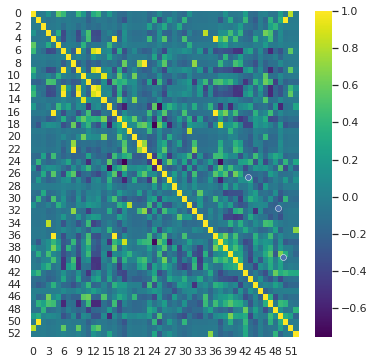

/*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*/
AxesSubplot(0.125,0.125;0.62x0.755)
/*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*/


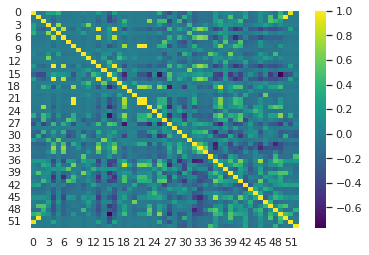

AxesSubplot(0.125,0.125;0.62x0.755)
zt39
(1, 224)
[[58 59 60 63 66 69 70 70 70 70 71 72 76 76 77 78 55 59 64 64 66 69 70 71
  68 71 70 73 75 75 78 76 55 58 59 63 67 68 70 71 68 70 71 72 76 77 77 77
  56 58 61 63 62 67 71 71 69 71 71 73 75 76 75 78 58 59 62 68 67 70 69 74
  69 71 73 73 77 78 77 78 50 52 55 58 60 63 65 67 67 66 68 69 73 73 75 76
  29 34 37 41 46 51 52 55 54 56 59 61 65 66 68 70 35 39 44 46 52 54 58 60
  58 60 62 64 68 70 71 72 58 61 63 66 67 69 71 72 68 72 73 72 77 77 77 82
  60 62 64 66 69 71 73 73 74 71 72 75 77 78 78 80 55 59 59 63 64 67 67 70
  69 74 71 73 76 79 78 78 27 32 40 41 48 49 53 53 55 57 58 61 64 67 68 70
   0  0  6 12 21 25 30 34 35 41 42 49 52 49 56 58 21 26 34 35 40 44 50 48
  52 55 59 58 62 64 66 68]]
/*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//*//

In [48]:


print("정확도 계산중... ")
print(" 정확도는 다음과 같다 ")
print(accuracy*100)
# from sklearn.datasets import make_blobs
# import matplotlib.pyplot as plt

# X,y = make_multilabel_classification(n_classes= 3,random_state = 0)

# clf.predict(X[-2:])
yt999 = yt3.reshape(-1,1)
ytridge2 = yt999.reshape(-1,)
xt35 = xt3.reshape(-1,1)
# knn = KNeighborsClassifier(n_neighbors=3)
# classifier = MultiOutputClassifier(knn, n_jobs=-1)
# classifier.fit(y_test,y_pred)
# predictions = classifier.predict(y_train)
# classifier.score(y_true,np.array(y_train))

from sklearn.linear_model import RidgeClassifierCV
clf = RidgeClassifierCV(cv = 5, normalize = True,).fit(xt35 , yt999) #1d array 필요 .ravel() 써서 평평하게 함 
y_score = clf.decision_function(yt999) #2d array 필요 
print("ridgeclassifier 스코어")
print(y_score)

# from sklearn.datasets import make_multilabel_classification
# from sklearn.multioutput import MultiOutputClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import roc_auc_score

# X, y = make_multilabel_classification(random_state=0)
# inner_clf = LogisticRegression(solver="liblinear", random_state=0)
# clf = MultiOutputClassifier(inner_clf).fit(X, y)
# y_score = np.transpose([y_pred[:, 1] for y_pred in clf.predict_proba(X)])
# roc_auc_score(y, y_score, average=None)
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
from sklearn import datasets
import scipy.stats as stats
import seaborn as sns
fig = plt.figure(figsize=(6, 6))


# clf9 = Pipeline([
#   ('feature_selection', SelectFromModel(LinearSVC(penalty="l1"))),
#   ('classification', RandomForestClassifier())
# ])
ett999 = ett3.reshape(-1,1)

gbrt = GradientBoostingClassifier(learning_rate=0.1,n_estimators =650,max_leaf_nodes=None, random_state=0,max_depth=6)
gbrt.fit(xt3, yt3)
print("gbrt결정 함수의 결과 형태: {}".format(gbrt.decision_function(yt999).shape))#2차원 요구--> ett3
# plot the first few entries of the decision function
print("gbrt결정 함수 결과:\n{}".format(gbrt.decision_function(yt999)[:6, :]))
print('/*/'*90)
print("gbrt가장 큰 결정 함수의 인덱스:\n{}".format(
      np.argmax(gbrt.decision_function(yt999), axis=1)))
print("gbrt예측:\n{}".format(gbrt.predict(yt999)))
print("gbrt 스코어")
print(gbrt.score(xt3,yt3))

# 가장 큰 결정 함수의 인덱스:
# [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
#  0]
# 예측:
# [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
#  0]
print('/*/'*90)
# predict_proba 결과 중 앞부분 일부를 확인합니다
print("예측 확률:\n{}".format(gbrt.predict_proba(yt999)[:9]))
# 행 방향으로 확률을 더하면 1 이 됩니다
print("합: {}".format(gbrt.predict_proba(yt999)[:9].sum(axis=1)))
# 예측 확률:
# [[0.10664722 0.7840248  0.10932798]
#  [0.78880668 0.10599243 0.10520089]
#  [0.10231173 0.10822274 0.78946553]
#  [0.10664722 0.7840248  0.10932798]
#  [0.10825347 0.66344934 0.22829719]
#  [0.78880668 0.10599243 0.10520089]]
# 합: [1. 1. 1. 1. 1. 1.]
print('/*/'*90)
x8x8 = pd.DataFrame(gbrt.decision_function(ett999))

x9x9 = x8x8.corr()

e9e9 = sns.heatmap(x9x9, cmap = 'viridis')

e0e0 = sns.scatterplot(xt33,yt33)
plt.show()
print('/*/'*90)
print(e0e0)
print('/*/'*90)

x88x88 = pd.DataFrame(gbrt.decision_function(yt999))
x99x99 = x88x88.corr()
e99e99 = sns.heatmap(x99x99, cmap = 'viridis')
# e0e0 = sns.scatterplot(xt33,yt33)
plt.show()

print(e99e99)





xt39 = np.transpose(xt3)
yt39 = np.transpose(yt3)
ett39 = np.transpose(ett3)
zt39 = np.transpose(zt3)
print("zt39")
print(zt39.shape)
print(zt39)
print('/*/'*90)
s = [0.7*np.linalg.norm([a, b]) for a, b in zip(xt3, yt3)]
s = [a / max(s) for a in s]  # scale
print("ett3.shape")
print(ett3.shape)
print('/*/'*90)
print("xt39.shape :xt39 = np.transpose(xt3)")
print(xt39.shape)
print('/*/'*90)
print("xt39")
print(xt39)


XX.shape :np.meshgrid(yy, xx)
(30, 30)
xy.shape : np.vstack([XX.ravel(), YY.ravel()]).T 
(900, 2)
xy1
[ 5.3        -4.1         5.3        -0.98965517  5.3         2.12068966
  5.3         5.23103448  5.3         8.34137931  5.3        11.45172414
  5.3        14.56206897  5.3        17.67241379  5.3        20.78275862
  5.3        23.89310345  5.3        27.00344828  5.3        30.1137931
  5.3        33.22413793  5.3        36.33448276  5.3        39.44482759]
xy3
[ 5.3        -4.1         5.3        -0.98965517  5.3         2.12068966
  5.3         5.23103448  5.3         8.34137931  5.3        11.45172414
  5.3        14.56206897  5.3        17.67241379  5.3        20.78275862
  5.3        23.89310345  5.3        27.00344828  5.3        30.1137931
  5.3        33.22413793  5.3        36.33448276  5.3        39.44482759]
xy3
[ 5.3        -4.1         5.3        -0.98965517  5.3         2.12068966
  5.3         5.23103448  5.3         8.34137931  5.3        11.45172414
  5.3        1

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


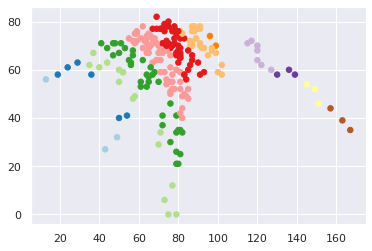

In [39]:

ax= plt.scatter(xt39[:300], yt39[:300], c=s, s=30, cmap=plt.cm.Paired)
clf = SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma=0.2,
  kernel='rbf', shrinking=True, tol=0.001)#파이프라인만들기

clf.fit(xt3,yt3) #2차원으로 fit X(왼쪽 xt3)에는 포인트가 있고 Y에는 해당 포인트가 속한 클래스가 있습니다.

# 초평면(Hyper-Plane) 표현
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
print("XX.shape :np.meshgrid(yy, xx)")
print(XX.shape)



xy = np.vstack([XX.ravel(), YY.ravel()]).T
print("xy.shape : np.vstack([XX.ravel(), YY.ravel()]).T ")
print(xy.shape)
xy = xy.reshape(-1,1)


xy1 = xy[:30]
xy1 = xy1.flatten()
xy1 = xy1[:899]
print("xy1")
print(xy1)
xy1 = xy1.reshape(-1,1)#$$$
xy2 = xy1[:30]#$$$
xy3 = xy2.flatten()#$$$
print("xy3")
print(xy3)
xy3 = xy3[:30]
xy99 = xy3.reshape(30,)#$$$
print("xy3")
print(xy3)
xy5= xy99.reshape(-1,1)#$$$
# print("clfdecisionfuction")
# print(fig.add_subplot(112, clf.decision_function(xy5)))
# Z = clf.decision_function(xy5).reshape(30,30)
# Z = clf.decision_function(xy5).reshape(-1,)#1차원으로 만들기
# print(Z)
# Z = Z[:900] # 900개까지 나열
# Z = Z.reshape(30,30) #30*30 행렬로 reshape
# ax.contour(XX, YY, Z, colors='k', levels=[-1,0,1], alpha=0.9, linestyles=['--', '-', '--'])
# # 지지벡터(Support Vector) 표현 
# ax.scatter(clf.support_vectors_[:,1], clf.support_vectors_[:,1], s=60, facecolors='r')
# plt.show()
# fig = plt.figure(figsize=(12, 12))


# ax2 = fig.add_subplot(111, projection='3d')
# ax2.scatter(xt39[:100], yt39[:100], yt39[:100], c= s , marker='o', s=15, cmap='Greens')

# print(yt3.shape)
# yt4 = yt3.reshape(-1,)
# print(yt4)
# print("ett4")
# print(ett4)
# yt5 = yt4[:96]
# print("yt5")
# print(yt5)
# accuracy = accuracy_score(ett4, yt5) #같은 shape 이어야 함. accuracy 랑 다른게 있다. 


# print("정확도 계산중... ")
# print(" 정확도는 다음과 같다 ")
# print(accuracy*100)



/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(224, 1)
(224, 1)


/tmp/ipykernel_13/517801934.py:50: UserWarning: No contour levels were found within the data range.
  ax.contour(XX, YY, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"])
/tmp/ipykernel_13/517801934.py:60: UserWarning: No contour levels were found within the data range.
  ax.contour(XX, YY, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"])


IndexError: index 1 is out of bounds for axis 1 with size 1

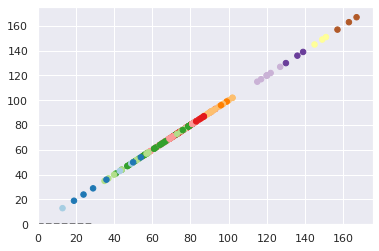

In [31]:
from sklearn import svm
# from sklearn.datasets import make_blobs
# import matplotlib.pyplot as plt

# X,y = make_multilabel_classification(n_classes= 3,random_state = 0)

# clf.predict(X[-2:])


# knn = KNeighborsClassifier(n_neighbors=3)
# classifier = MultiOutputClassifier(knn, n_jobs=-1)
# classifier.fit(y_test,y_pred)
# predictions = classifier.predict(y_train)
# classifier.score(y_true,np.array(y_train))

# from sklearn.linear_model import RidgeClassifierCV
# clf = RidgeClassifierCV().fit(X_train, y_train)
# y_score = clf.decision_function(X_train)
# roc_auc_score(y_test, y_train, average=None)

# from sklearn.datasets import make_multilabel_classification
# from sklearn.multioutput import MultiOutputClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import roc_auc_score

# X, y = make_multilabel_classification(random_state=0)
# inner_clf = LogisticRegression(solver="liblinear", random_state=0)
# clf = MultiOutputClassifier(inner_clf).fit(X, y)
# y_score = np.transpose([y_pred[:, 1] for y_pred in clf.predict_proba(X)])
# roc_auc_score(y, y_score, average=None)
clf = svm.SVC(kernel="linear", C=1000)
x__train = xt3.reshape(-1,1)
y__train = yt3.reshape(-1,1)

clf.fit(x__train, y__train)
print(xt3.shape)
print(yt3.shape)
s = [0.1*np.linalg.norm([a, b]) for a, b in zip(xt3, yt3)]
s = [a / max(s) for a in s]  # scale

plt.scatter(xt3[:224], xt3[:224], c=s, s=30, cmap=plt.cm.Paired)

# decision function 표현 초평면(Hyper-Plane) 표현
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# plot decision boundary and margins
# Z = clf.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"])

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()])



# plot decision boundary and margins
ax.contour(XX, YY, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"])

# 지지벡터(Support Vector) 표현
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()